In [19]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
import albumentations as A

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

data_dir = "/content/drive/My Drive/TCIA_Data/images/Spine-Mets-CT-SEG"

patient_folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
patient_folders.sort()
print(patient_folders)


['10250', '10352', '10355', '10456', '10458', '10543', '11084', '11471', '12196', '12459', '12855', '13055', '13089', '13627', '13641', '13643', '13653', '13662', '13681', '13683', '13697', '13800', '13819', '13838', '13843', '13977', '13989', '14078', '14089', '14138', '14151', '14293', '14313', '14316', '14427', '14434', '14439', '14445', '14487', '14636', '14638', '14643', '14650', '14655', '14659', '14797', '14826', '14874', '14912', '15001', '15027', '15040', '15041', '15067', '15094']


In [8]:
#Extracts patient folders from directory and sorting
patient_folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
patient_folders.sort()

In [4]:
print(f"Total patients: {len(patient_folders)}")

Total patients: 55


In [9]:
# Data Statistics
image_counts = {}
for patient in patient_folders:
    patient_dir = os.path.join(data_dir, patient)
    images = [f for f in os.listdir(patient_dir) if f.endswith(".jpg")]
    image_counts[patient] = len(images)

In [22]:
#Dictionary of patient folder mapped to its image counts
print(image_counts)

{'10250': 797, '10352': 1134, '10355': 451, '10456': 797, '10458': 390, '10543': 797, '11084': 969, '11471': 797, '12196': 399, '12459': 797, '12855': 651, '13055': 527, '13089': 508, '13627': 430, '13641': 797, '13643': 532, '13653': 2124, '13662': 522, '13681': 399, '13683': 797, '13697': 817, '13800': 221, '13819': 797, '13838': 797, '13843': 242, '13977': 412, '13989': 527, '14078': 350, '14089': 332, '14138': 574, '14151': 797, '14293': 537, '14313': 797, '14316': 399, '14427': 797, '14434': 590, '14439': 450, '14445': 797, '14487': 477, '14636': 435, '14638': 544, '14643': 522, '14650': 797, '14655': 399, '14659': 397, '14797': 797, '14826': 793, '14874': 399, '14912': 797, '15001': 517, '15027': 495, '15040': 797, '15041': 399, '15067': 797, '15094': 1317}


In [16]:
total_images = sum(image_counts.values())
avg_images_per_patients = total_images/len(patient_folders)
min_images = min(image_counts.values())
max_images = max(image_counts.values())

In [17]:
print(total_images)
print(avg_images_per_patient)
print(min_images)
print(max_images)

35527
645.9454545454546
221
2124


In [26]:
csv_path = "/content/drive/MyDrive/TCIA_Data/Spine_Data_Copy.csv"
labels_df = pd.read_csv(csv_path)

In [33]:
print("Column names in CSV:", labels_df.columns.tolist())

#Map Patient/Case Number to the Lesion label as per csv file
label_dict = dict(zip(labels_df["Case"].astype(str), labels_df["Vertebrae with Majority Lesions"]))

Column names in CSV: ['Case', 'Age (Y)', 'Sex', 'Height (m)', 'Weight (kg)', 'BMI (kg/m^2)', 'Primary cancer', 'Vertebrae with Lesions', 'Vertebrae with Majority Lesions', 'Blastic', 'Lytic', 'Mixed', 'Comments/Fractures']


In [34]:
print(label_dict)

{'10250.0': 'Mixed lesion', '10352.0': 'No lesions observed', '10355.0': 'Mixed lesion', '10456.0': 'Lytic lesion', '10458.0': 'Blastic lesion', '10543.0': 'Blastic lesion', '11084.0': 'Lytic lesion', '11471.0': 'Lytic lesion', '12196.0': 'Blastic lesion', '12459.0': 'No lesions observed', '12855.0': 'Mixed lesion', '13055.0': 'Mixed lesion', '13089.0': 'Mixed lesion', '13627.0': 'Lytic lesion', '13641.0': 'Blastic lesion', '13643.0': 'Blastic lesion', '13653.0': 'Lytic lesion', '13662.0': 'Blastic lesion', '13681.0': 'No lesions observed', '13683.0': 'Lytic lesion', '13697.0': 'Blastic lesion', '13800.0': 'Mixed lesion', '13819.0': 'Lytic lesion', '13838.0': 'No lesions observed', '13843.0': 'Lytic lesion', '13977.0': 'No lesions observed', '13989.0': 'Mixed lesion', '14078.0': 'Lytic lesion', '14089.0': 'No lesions observed', '14138.0': 'Lytic lesion', '14151.0': 'Lytic lesion', '14293.0': 'No lesions observed', '14313.0': 'Blastic lesion', '14316.0': 'No lesions observed', '14427.0'

In [42]:
label_counts = Counter(label_dict.values())
print(label_counts)

Counter({'Lytic lesion': 19, 'Blastic lesion': 18, 'Mixed lesion': 9, 'No lesions observed': 9, nan: 1})


In [43]:
print("\nLabel Distribution:")
for label, count in label_counts.items():
    print(f"{label}: {count} patients")


Label Distribution:
Mixed lesion: 9 patients
No lesions observed: 9 patients
Lytic lesion: 19 patients
Blastic lesion: 18 patients
nan: 1 patients


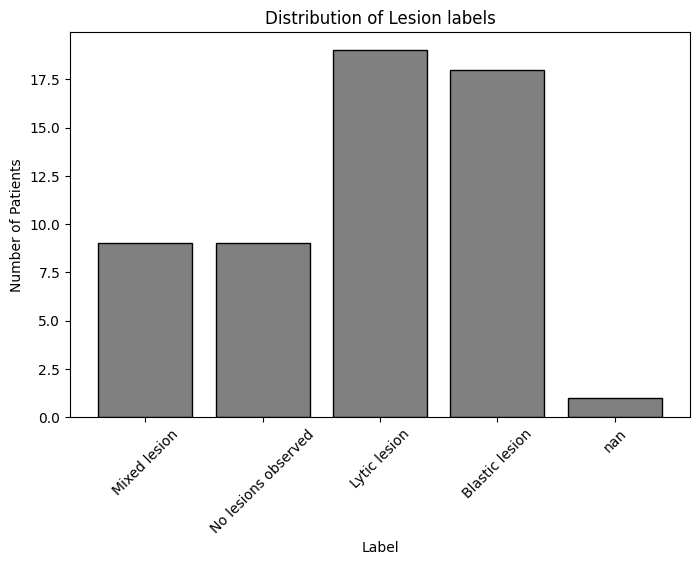

In [49]:
label_keys = [str(key) for key in label_counts.keys()]

plt.figure(figsize=(8, 5))
plt.bar(label_keys, label_counts.values(), color='gray', edgecolor='black')
plt.title("Distribution of Lesion labels")
plt.xlabel("Label")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

In [52]:
#Makes sure the images inside each patient folder are in order
time_sorted_images = {}
for patient in patient_folders:
    patient_dir = os.path.join(data_dir, patient)
    images = [f for f in os.listdir(patient_dir) if f.endswith(".jpg")]
    images.sort()
    time_sorted_images[patient] = [os.path.join(patient_dir, img) for img in images]
